In [41]:
import matplotlib.pyplot as plt
from processing import process_data

In [42]:
file_name = 'data/ea_sectoral_data.xlsx'
file_name2 = 'data/ea_gdp_growth_data.xlsx'

# Load and process the data
df = process_data(file_name)
df2 = process_data(file_name2)

# Join the two dataframes on the indeces
data = df.join(df2, how='outer')

df.to_csv('data/processed_data.csv')

In [43]:
# Group the data by 'Country Name' and 'Year' and calculate the mean for each variable
mean_by_year = data.groupby(['Year']).mean()

# Group the data by 'Country Name' and 'Year' and calculate the mean for each variable
sum_by_year = data.groupby(['Year']).sum()

data.reset_index(inplace=True)

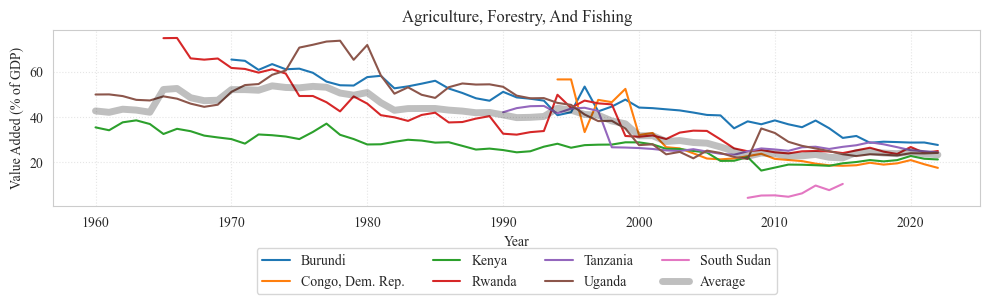

Values for Burundi (Agriculture, forestry, and fishing, value added (% of GDP)) in ten-year intervals starting from 2022 going back:
2022 27.566713782405255
2012 35.42003257416088
2002 43.33361124212516
1992 48.004521705755934
1982 52.612676828599625
1972 60.77312761050965
1962 nan

Values for Congo, Dem. Rep. (Agriculture, forestry, and fishing, value added (% of GDP)) in ten-year intervals starting from 2022 going back:
2022 17.44049839595218
2012 20.44106070560802
2002 26.58377932049918
1992 nan
1982 nan
1972 nan
1962 nan

Values for Kenya (Agriculture, forestry, and fishing, value added (% of GDP)) in ten-year intervals starting from 2022 going back:
2022 21.165716910252133
2012 18.82972593294458
2002 25.853967603945634
1992 24.78128722381902
1982 28.96660108928678
1972 32.21093542386394
1962 37.57419488349097

Values for Rwanda (Agriculture, forestry, and fishing, value added (% of GDP)) in ten-year intervals starting from 2022 going back:
2022 24.89459791773064
2012 24.7650296791

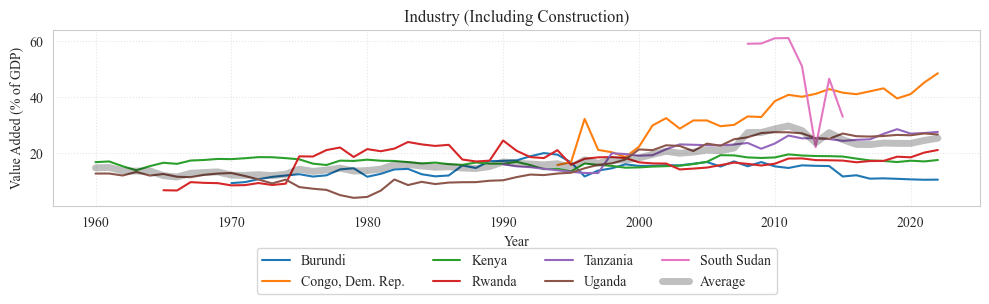

Values for Burundi (Industry (including construction), value added (% of GDP)) in ten-year intervals starting from 2022 going back:
2022 10.637787756804505
2012 15.750813017067266
2002 15.8040004931229
1992 18.986006151784686
1982 14.294878824432503
1972 10.793965381516433
1962 nan

Values for Congo, Dem. Rep. (Industry (including construction), value added (% of GDP)) in ten-year intervals starting from 2022 going back:
2022 48.64819110614205
2012 40.25475637856694
2002 32.61833688380493
1992 nan
1982 nan
1972 nan
1962 nan

Values for Kenya (Industry (including construction), value added (% of GDP)) in ten-year intervals starting from 2022 going back:
2022 17.65622358497764
2012 19.26155255788996
2002 15.453561180366881
1992 15.846070726597913
1982 17.309581225319512
1972 18.680574010098326
1962 15.428658845888583

Values for Rwanda (Industry (including construction), value added (% of GDP)) in ten-year intervals starting from 2022 going back:
2022 21.234773118231356
2012 18.230115671

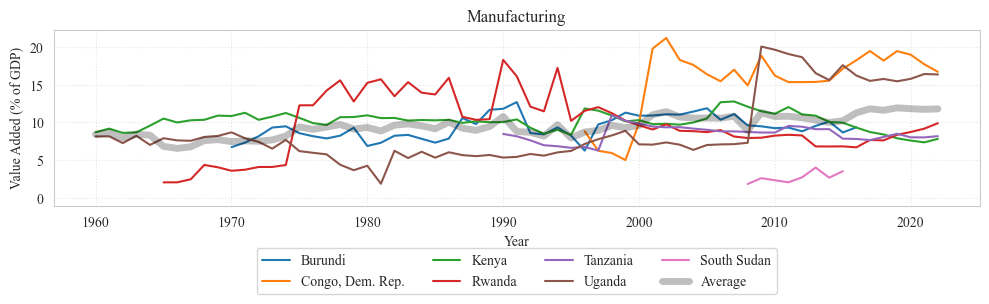

Values for Burundi (Manufacturing, value added (% of GDP)) in ten-year intervals starting from 2022 going back:
2022 nan
2012 8.830567739340163
2002 11.086734100799504
1992 8.599290936423284
1982 8.245750630551596
1972 8.174426035174157
1962 nan

Values for Congo, Dem. Rep. (Manufacturing, value added (% of GDP)) in ten-year intervals starting from 2022 going back:
2022 16.732796479647043
2012 15.361348680925865
2002 21.216790556639076
1992 nan
1982 nan
1972 nan
1962 nan

Values for Kenya (Manufacturing, value added (% of GDP)) in ten-year intervals starting from 2022 going back:
2022 7.826618712570147
2012 11.083340273129396
2002 9.823609462483569
1992 9.307076684075675
1982 10.60018961447903
1972 10.354770130215254
1962 8.621472313032216

Values for Rwanda (Manufacturing, value added (% of GDP)) in ten-year intervals starting from 2022 going back:
2022 9.906837018915835
2012 8.282230637969196
2002 9.766664954587089
1992 12.106047567617557
1982 13.482948644998435
1972 4.09691688447284

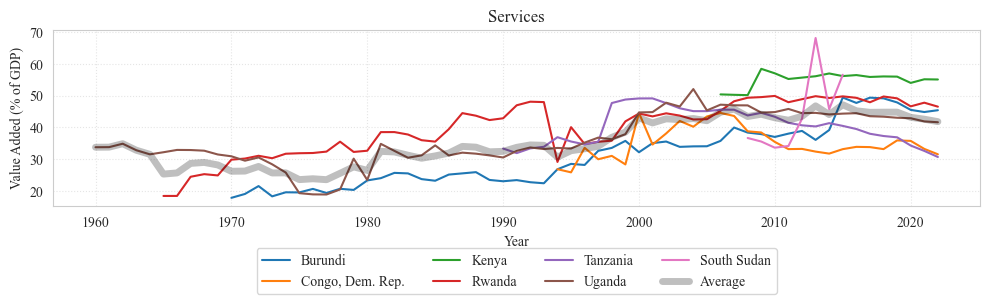

Values for Burundi (Services, value added (% of GDP)) in ten-year intervals starting from 2022 going back:
2022 45.373602242404544
2012 38.84958902009532
2002 35.50594768364534
1992 22.68145958773929
1982 25.629016339510912
1972 21.465219444881782
1962 nan

Values for Congo, Dem. Rep. (Services, value added (% of GDP)) in ten-year intervals starting from 2022 going back:
2022 31.48239198589685
2012 33.18206259668038
2002 38.0515982890655
1992 nan
1982 nan
1972 nan
1962 nan

Values for Kenya (Services, value added (% of GDP)) in ten-year intervals starting from 2022 going back:
2022 55.05813736036037
2012 55.64971069965521
2002 nan
1992 nan
1982 nan
1972 nan
1962 nan

Values for Rwanda (Services, value added (% of GDP)) in ten-year intervals starting from 2022 going back:
2022 46.493828321589994
2012 48.84488343566632
2002 44.39572151313593
1992 48.05894676441003
1982 38.48195403222258
1972 31.013213427778446
1962 nan

Values for Tanzania (Services, value added (% of GDP)) in ten-year i

In [44]:
# Filter columns with 'Employment in' in their name
value_added_columns = [col for col in data.columns if 'value added (% of GDP)' in col]

# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Iterate over value added columns and plot time series
for col in value_added_columns:
    # Create a new figure for each column
    fig, ax = plt.subplots(figsize=(10, 3.3))
    
    for country in data['Country Name'].unique():
        country_data = data[data['Country Name'] == country]
        ax.plot(country_data['Year'], country_data[col], label=country)
    
    # Plot the mean line
    ax.plot(mean_by_year.index, mean_by_year[col], linewidth=5, alpha=0.25, color='black')

    # Remove ', value added (% of GDP)' from the title and change to Title case
    title = col.replace(', value added (% of GDP)', '').title()
    #title += " Across East Africa"
    ax.set_title(title)
    ax.title.set_position([.5, 1.025])  # Move the title 0.025 up

    # Add mean to the legend
    legend_labels = [country for country in data['Country Name'].unique()]
    legend_labels.append('Average')
    ax.legend(labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(legend_labels)/2)  # Move legend below x-axis
    
    ax.set_xlabel('Year')  # Label x-axis
    ax.set_ylabel('Value Added (% of GDP)')  # Label y-axis
    
    ax.grid(True, linestyle='dotted', alpha=0.5)  # Change grid lines to dotted and translucent

    plt.tight_layout()
    plt.show()

    # Print the values of each time series in ten-year intervals starting from 2022 going back
    for country in data['Country Name'].unique():
        country_data = data[data['Country Name'] == country]
        print(f"Values for {country} ({col}) in ten-year intervals starting from 2022 going back:")
        for i in range(len(country_data)-1, -1, -10):
            print(country_data.iloc[i]['Year'], country_data.iloc[i][col])
        print()


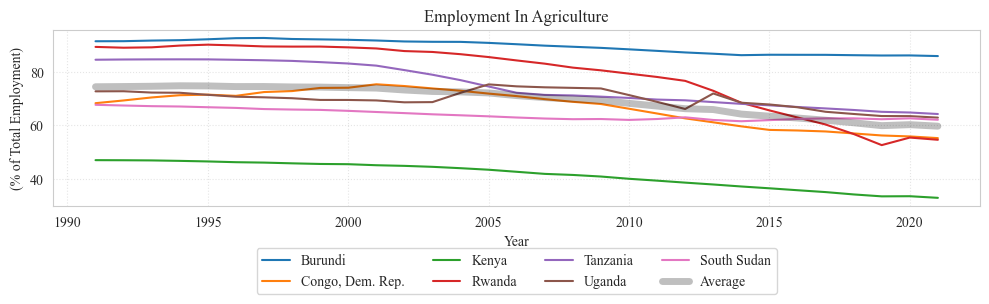

Values for Burundi (Employment in agriculture (% of total employment) (modeled ILO estimate)) in ten-year intervals starting from 2022 going back:
2021 85.8503
2011 87.78889
2001 91.6497
1991 91.37289
1981 nan
1971 nan
1961 nan

Values for Congo, Dem. Rep. (Employment in agriculture (% of total employment) (modeled ILO estimate)) in ten-year intervals starting from 2022 going back:
2021 55.2838
2011 64.45222
2001 75.3428
1991 68.30069
1981 nan
1971 nan
1961 nan

Values for Kenya (Employment in agriculture (% of total employment) (modeled ILO estimate)) in ten-year intervals starting from 2022 going back:
2021 33.03382
2011 39.43818
2001 45.18236
1991 47.07449
1981 nan
1971 nan
1961 nan

Values for Rwanda (Employment in agriculture (% of total employment) (modeled ILO estimate)) in ten-year intervals starting from 2022 going back:
2021 54.66548
2011 78.06486
2001 88.6899
1991 89.26546
1981 nan
1971 nan
1961 nan

Values for Tanzania (Employment in agriculture (% of total employment) (mod

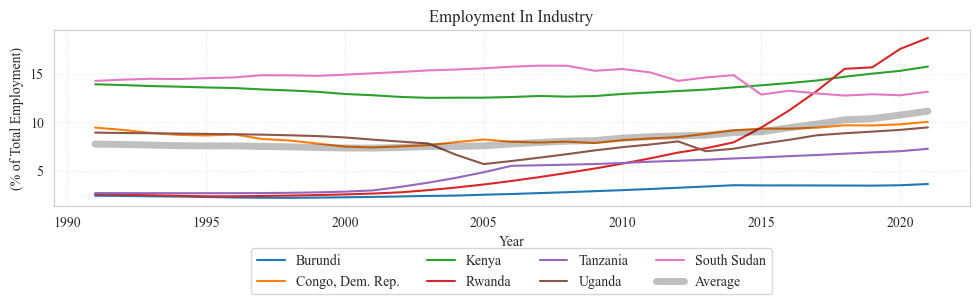

Values for Burundi (Employment in industry (% of total employment) (modeled ILO estimate)) in ten-year intervals starting from 2022 going back:
2021 3.619404
2011 3.10609
2001 2.292545
1991 2.415699
1981 nan
1971 nan
1961 nan

Values for Congo, Dem. Rep. (Employment in industry (% of total employment) (modeled ILO estimate)) in ten-year intervals starting from 2022 going back:
2021 10.02869
2011 8.316165
2001 7.389514
1991 9.433605
1981 nan
1971 nan
1961 nan

Values for Kenya (Employment in industry (% of total employment) (modeled ILO estimate)) in ten-year intervals starting from 2022 going back:
2021 15.72709
2011 13.05486
2001 12.7723
1991 13.90287
1981 nan
1971 nan
1961 nan

Values for Rwanda (Employment in industry (% of total employment) (modeled ILO estimate)) in ten-year intervals starting from 2022 going back:
2021 18.67677
2011 6.269548
2001 2.638423
1991 2.564579
1981 nan
1971 nan
1961 nan

Values for Tanzania (Employment in industry (% of total employment) (modeled ILO est

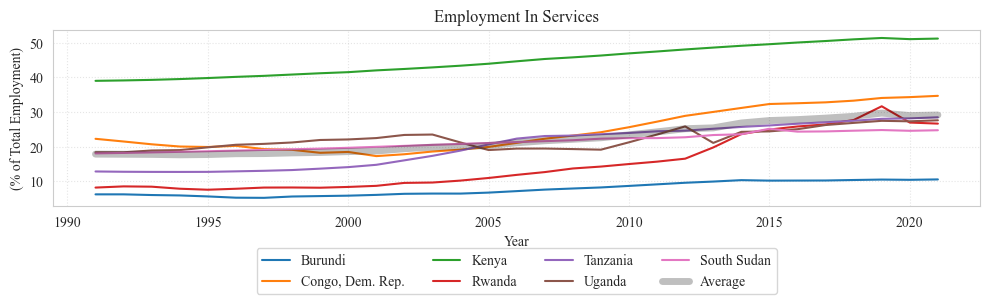

Values for Burundi (Employment in services (% of total employment) (modeled ILO estimate)) in ten-year intervals starting from 2022 going back:
2021 10.53029
2011 9.105044
2001 6.057759
1991 6.21141
1981 nan
1971 nan
1961 nan

Values for Congo, Dem. Rep. (Employment in services (% of total employment) (modeled ILO estimate)) in ten-year intervals starting from 2022 going back:
2021 34.68751
2011 27.23159
2001 17.26765
1991 22.2657
1981 nan
1971 nan
1961 nan

Values for Kenya (Employment in services (% of total employment) (modeled ILO estimate)) in ten-year intervals starting from 2022 going back:
2021 51.23912
2011 47.50697
2001 42.04532
1991 39.02262
1981 nan
1971 nan
1961 nan

Values for Rwanda (Employment in services (% of total employment) (modeled ILO estimate)) in ten-year intervals starting from 2022 going back:
2021 26.65773
2011 15.66562
2001 8.671632
1991 8.169966
1981 nan
1971 nan
1961 nan

Values for Tanzania (Employment in services (% of total employment) (modeled ILO est

In [45]:
# Filter columns with 'Employment in' in their name
employment_columns = [col for col in data.columns if 'Employment in' in col]

# Set the font to Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Iterate over value added columns and plot time series
for col in employment_columns:
    # Create a new figure for each column
    fig, ax = plt.subplots(figsize=(10, 3.3))
    
    for country in data['Country Name'].unique():
        country_data = data[data['Country Name'] == country]
        ax.plot(country_data['Year'], country_data[col], label=country)
    
    # Plot the mean line
    ax.plot(mean_by_year.index, mean_by_year[col], linewidth=5, alpha=0.25, color='black')
    
    # Remove ', value added (% of GDP)' from the title and change to Title case
    title = col.replace(' (% of total employment) (modeled ILO estimate)', '').title()
    #title += " Across East Africa"
    ax.set_title(title)
    ax.title.set_position([.5, 1.025])  # Move the title 0.025 up
    
    # Add mean to the legend
    legend_labels = [country for country in data['Country Name'].unique()]
    legend_labels.append('Average')
    ax.legend(labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(legend_labels)/2)  # Move legend below x-axis
    
    ax.set_xlabel('Year')  # Label x-axis
    ax.set_ylabel('(% of Total Employment)')  # Label y-axis
    
    ax.grid(True, linestyle='dotted', alpha=0.5)  # Change grid lines to dotted and translucent

    plt.tight_layout()
    plt.show()

    # Print the values of each time series in ten-year intervals starting from 2022 going back
    for country in data['Country Name'].unique():
        country_data = data[data['Country Name'] == country]
        print(f"Values for {country} ({col}) in ten-year intervals starting from 2022 going back:")
        for i in range(len(country_data)-2, -1, -10):
            print(country_data.iloc[i]['Year'], country_data.iloc[i][col])
        print()

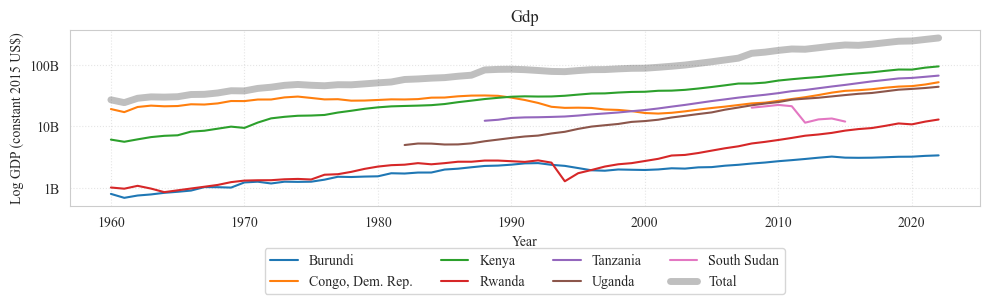

Values for Burundi (GDP (constant 2015 US$)) in ten-year intervals starting from 2022 going back:
2022 3379450983.5793076
2012 2953153931.418485
2002 2084351676.0962427
1992 2530356483.0746117
1982 1712032035.939149
1972 1179713806.731132
1962 751192343.5309299

Values for Congo, Dem. Rep. (GDP (constant 2015 US$)) in ten-year intervals starting from 2022 going back:
2022 52355494700.27247
2012 29863789002.306564
2002 16657920852.755264
1992 24101047261.99538
1982 27440771397.933628
1972 27421573854.940025
1962 20710801750.40853

Values for Kenya (GDP (constant 2015 US$)) in ten-year intervals starting from 2022 going back:
2022 94795843915.2016
2012 61281315707.76674
2002 38223413553.1441
1992 30622875165.1012
1982 21518282741.49341
1972 13527086929.855453
1962 6159869229.142284

Values for Rwanda (GDP (constant 2015 US$)) in ten-year intervals starting from 2022 going back:
2022 12955698812.24037
2012 7059591972.351972
2002 3362386284.866007
1992 2802961762.4088507
1982 2384160997.38

In [46]:
from matplotlib.ticker import ScalarFormatter

col = "GDP (constant 2015 US$)"

fig, ax = plt.subplots(figsize=(10, 3.3))

for country in data['Country Name'].unique():
    country_data = data[data['Country Name'] == country]
    ax.plot(country_data['Year'], country_data[col], label=country)
    
# Plot the mean line
ax.plot(sum_by_year.index, sum_by_year[col], linewidth=5, alpha=0.25, color='black')
    
# Remove ', value added (% of GDP)' from the title and change to Title case
title = col.replace(' (constant 2015 US$)', '').title()
#title += " Across East Africa"
ax.set_title(title)
ax.title.set_position([.5, 1.025])  # Move the title 0.025 up
    
# Add mean to the legend
legend_labels = [country for country in data['Country Name'].unique()]
legend_labels.append('Total')
ax.legend(labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(legend_labels)/2)  # Move legend below x-axis
    
ax.set_xlabel('Year')  # Label x-axis
ax.set_ylabel("Log " + col)  # Label y-axis
ax.set_yscale('log')  # Set y-axis to log scale
ax.yaxis.set_major_formatter(ScalarFormatter())  # Indicate log scale on y-axis label

# Change y-axis ticks to billions
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False, useMathText=True))
ax.yaxis.set_major_formatter(lambda x, pos: f'{x/1e9:.0f}B')

ax.grid(True, linestyle='dotted', alpha=0.5)  # Change grid lines to dotted and translucent

plt.tight_layout()
plt.show()

# Print the values of each time series in ten-year intervals starting from 2022 going back
for country in data['Country Name'].unique():
    country_data = data[data['Country Name'] == country]
    print(f"Values for {country} ({col}) in ten-year intervals starting from 2022 going back:")
    for i in range(len(country_data)-1, -1, -10):
        print(country_data.iloc[i]['Year'], country_data.iloc[i][col])
    print()

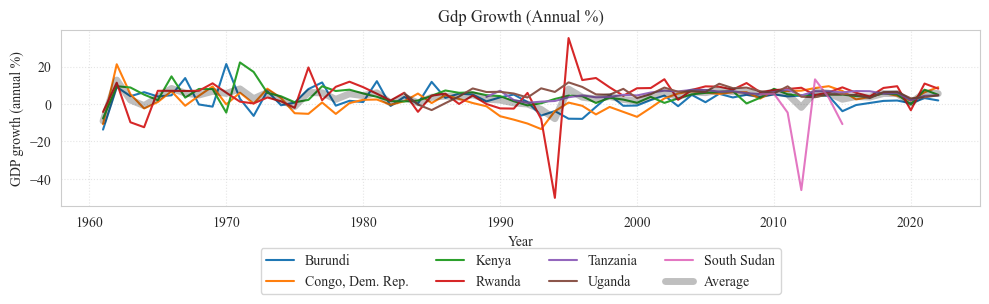

Values for Burundi (GDP growth (annual %)) in ten-year intervals starting from 2022 going back:
2022 1.8489999989932642
2012 4.446706331114953
2002 4.446519412247966
1992 1.0099983709962856
1982 -1.053599820210124
1972 -6.40396492407875
1962 9.063157933865625

Values for Congo, Dem. Rep. (GDP growth (annual %)) in ten-year intervals starting from 2022 going back:
2022 8.924447850795175
2012 7.0868989467194154
2002 2.9477651835976673
1992 -10.500008564647729
1982 -0.45767760896157483
1972 0.15113551378904333
1962 21.2006975148133

Values for Kenya (GDP growth (annual %)) in ten-year intervals starting from 2022 going back:
2022 4.846634855770702
2012 4.56867961444982
2002 0.5468595301755954
1992 -0.7994939586413494
1982 1.5064782575770579
1972 17.082429349983002
1962 9.457358740721261

Values for Rwanda (GDP growth (annual %)) in ten-year intervals starting from 2022 going back:
2022 8.157487721063731
2012 8.641517545071494
2002 13.19206613366886
1992 5.872725237590771
1982 1.8108464472

In [47]:
col = "GDP growth (annual %)"

fig, ax = plt.subplots(figsize=(10, 3.3))

for country in data['Country Name'].unique():
    country_data = data[data['Country Name'] == country]
    ax.plot(country_data['Year'], country_data[col], label=country)

# Plot the mean line
ax.plot(mean_by_year.index, mean_by_year[col], linewidth=5, alpha=0.25, color='black')

# Remove ', value added (% of GDP)' from the title and change to Title case
title = col.replace(' (constant 2015 US$)', '').title()
#title += " Across East Africa"
ax.set_title(title)
ax.title.set_position([.5, 1.025])  # Move the title 0.025 up

# Add mean to the legend
legend_labels = [country for country in data['Country Name'].unique()]
legend_labels.append('Average')
ax.legend(labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(legend_labels)/2)  # Move legend below x-axis

ax.set_xlabel('Year')  # Label x-axis
ax.set_ylabel(col)  # Label y-axis

ax.grid(True, linestyle='dotted', alpha=0.5)  # Change grid lines to dotted and translucent

plt.tight_layout()
plt.show()

# Print the values of each time series in ten-year intervals starting from 2022 going back
for country in data['Country Name'].unique():
    country_data = data[data['Country Name'] == country]
    print(f"Values for {country} ({col}) in ten-year intervals starting from 2022 going back:")
    for i in range(len(country_data)-1, -1, -10):
        print(country_data.iloc[i]['Year'], country_data.iloc[i][col])
    print()